# Proyecto de future sales

## 1) Importar data y revisar si hay que limpiar

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
import seaborn as sns

dataset = pd.read_csv('advertising.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


array([[<AxesSubplot: title={'center': 'TV'}>,
        <AxesSubplot: title={'center': 'Radio'}>],
       [<AxesSubplot: title={'center': 'Newspaper'}>,
        <AxesSubplot: title={'center': 'Sales'}>]], dtype=object)

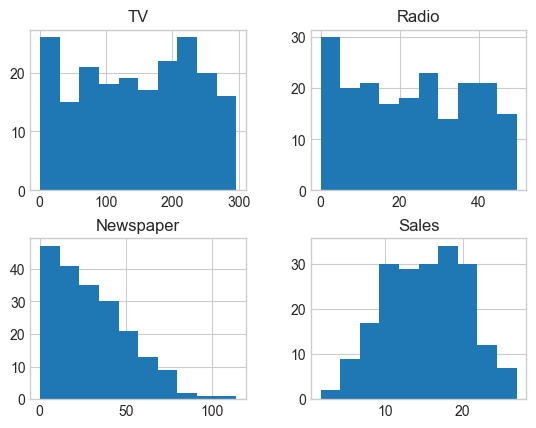

In [16]:
dataset.info()
dataset.hist()

In [17]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## 2) Definir funcion para ver si hay outliers

In [18]:
def PlotData(features):
    plt.figure(figsize= (20, 5))    
    pltNum = 1
    for mem in features:
        plt.subplot(1, 3 , pltNum)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = dataset, x = mem, y = 'Sales' , color = 'green')
        pltNum += 1
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4168\2335367731.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\user\AppData\Local\Temp\ipykernel_4168\2335367731.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\user\AppData\Local\Temp\ipykernel_4168\2335367731.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will 

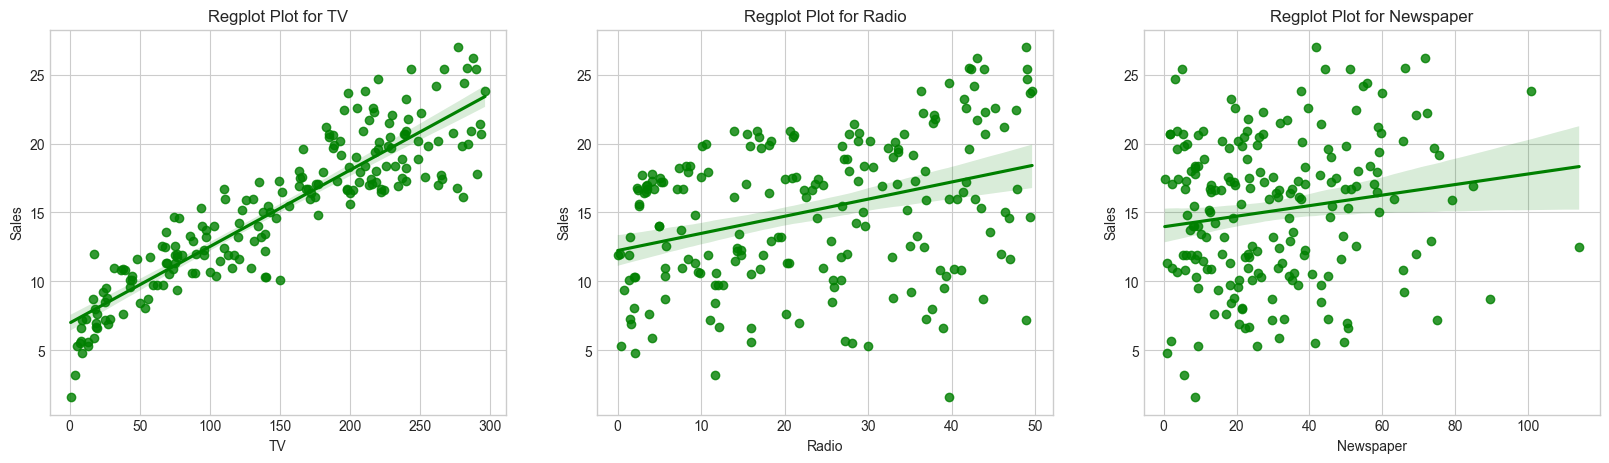

In [19]:
PlotData(['TV', 'Radio', 'Newspaper'])

## 3) Ahora hay que empezar a entrenar el modelo
### Primero hay que hacer normalizar los datos

In [6]:
parametros = np.array(dataset[['TV', 'Radio', 'Newspaper']], dtype = 'float32')
sales = np.array(dataset['Sales'], dtype = 'float32')
max_sales = max(sales)
print('Max value of likes is {}'.format(max_sales))

Max value of likes is 27.0


In [7]:
frac_sales = sales/max_sales

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(parametros, sales, test_size = 0.2, random_state = 42)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
gradiente = GradientBoostingRegressor()
gradiente.fit(x_train, y_train)

GradientBoostingRegressor()

## 3) Ahora hay que agregar los resultado

In [11]:
predic = gradiente.predict(x_test)
print(predic)
print(y_test)

[17.41885269 23.21246406 20.33085709  6.19888096 23.76475311 13.67283304
 22.4244042   9.63988804 16.71870976 16.08010016  7.93712148  9.82573069
 17.78935533  4.1497762  10.95468303 15.77188722  6.14018913 17.63011584
 11.29922644 19.73754635 20.05817417 13.75630295  9.79285413 22.62150407
 10.94132606  9.0825605  21.63585846 13.34708147 11.07009583  5.81824457
 16.75564446 11.72090578 23.00662393 10.09276656 20.10903667 20.41852804
 12.14058484 19.69215012 11.97102858  7.51591074]
[16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1 11.   8.7 16.9  5.3
 10.3 16.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2 11.3  8.1 21.7 13.4
 10.6  5.7 15.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9]


C:\Users\user\AppData\Local\Temp\ipykernel_1332\2823864311.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[]

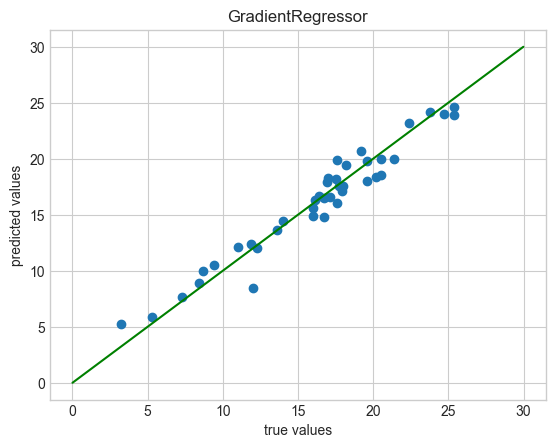

In [14]:
plt.scatter(y_test, predic)
plt.style.use('seaborn-whitegrid')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,30, 0.01), np.arange(0, 30, 0.01), color = 'green')
plt.plot(color = 'green')

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error (MSE): %.2f' %mean_squared_error(predic, y_test))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, predic))
i = 0
suma = 0
lista_error = []

while i < len(predic):
    lista_error.append((predic[i] - y_test[i])/predic[i])
    i += 1

for a in lista_error:
    suma += a

percentage_error = suma/len(lista_error) * 100
print(f'El error porcentual es: {round(percentage_error,1)} %')

Mean squared error (MSE): 1.24
Coefficient of determination (R^2): 0.96
El error porcentual es: 0.9 %


In [13]:
print(y_test)

[16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1 11.   8.7 16.9  5.3
 10.3 16.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2 11.3  8.1 21.7 13.4
 10.6  5.7 15.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9]


In [14]:
y1 = y_test